This is a regression problem. You have to predict "price".
We should split date into year and month columns. You can then optionally combine them into a numeric date column.
Split the data into train and test, using 0.9 for the ratio, and a seed of 123. That should give you 19,462 training rows and 2,151 test rows. If you decide you want a valid data set, too, split that from train after doing the above split.

Your target is an RMSE below $123,000.

In [0]:
!pip install h2o
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Users/kang/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/59/k6h68_m55b9fd44rrtd3st840000gn/T/tmp9a61fl0a
  JVM stdout: /var/folders/59/k6h68_m55b9fd44rrtd3st840000gn/T/tmp9a61fl0a/h2o_sangyunkang_started_from_python.out
  JVM stderr: /var/folders/59/k6h68_m55b9fd44rrtd3st840000gn/T/tmp9a61fl0a/h2o_sangyunkang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,"14 days, 4 hours and 39 minutes"
H2O_cluster_name:,H2O_from_python_sangyunkang_235kdn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.101 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [0]:
h2o.remove_all  # clean slate, in case cluster was already running

<function h2o.h2o.remove_all(retained=None)>

In [0]:
url = "http://coursera.h2o.ai/house_data.3487.csv"
data = h2o.import_file(path=url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Step one is to start h2o, load your chosen data set(s) and follow the project-specific data manipulation steps. At the end of this step you will have `train`, `test`, `x` and `y` variables, and possibly `valid` also. Check you have the correct number of rows and columns (as specified in the project description) before moving on.

In [0]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7.1293e+09,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6.4141e+09,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5.6315e+09,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2.4872e+09,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1.9544e+09,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7.23755e+09,20140512T000000,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1.3214e+09,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2.008e+09,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2.4146e+09,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
3.7935e+09,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [0]:
data["year"] = data["date"].year()

In [0]:
data["month"] = data["date"].month()

In [0]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
7.1293e+09,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1970,1
6.4141e+09,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,1970,1
5.6315e+09,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1970,1
2.4872e+09,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1970,1
1.9544e+09,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1970,1
7.23755e+09,20140512T000000,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1970,1
1.3214e+09,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,1970,1
2.008e+09,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,1970,1
2.4146e+09,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,1970,1
3.7935e+09,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,1970,1


In [0]:
data.shape

(21613, 23)

In [0]:
data.describe()

Rows:21613
Cols:23




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
type,int,enum,int,int,real,int,int,real,int,int,int,int,int,int,int,int,int,real,real,int,int,int,int
mins,1000102.0,,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0,1970.0,1.0
mean,4580301520.864987,,540088.1417665284,3.370841623097218,2.114757321982139,2079.899736269819,15106.96756581695,1.4943089807060526,0.007541757275713691,0.23430342849211097,3.4094295100171164,7.6568731781798105,1788.3906907879518,291.50904548188555,1971.0051357979064,84.4022579003377,98077.93980474674,47.56005251931665,-122.21389640494158,1986.5524915560036,12768.45565169118,1970.0,1.0
maxs,9900000190.0,,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0,1970.0,1.0
sigma,2876565571.3120522,,367127.19648270035,0.930061831147451,0.7701631572177408,918.4408970468095,41420.51151513551,0.5399888951423489,0.08651719772788766,0.7663175692736117,0.6507430463662044,1.1754587569743344,828.0909776519175,442.57504267746685,29.373410802386235,401.67924001917555,53.50502625747248,0.13856371024192365,0.14082834238139275,685.3913042527788,27304.179631338524,0.0,0.0
zeros,0,,0,13,10,0,0,0,21450,19489,0,0,0,13126,0,20699,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7129300520.0,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1970.0,1.0
1,6414100192.0,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.721,-122.319,1690.0,7639.0,1970.0,1.0
2,5631500400.0,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,1970.0,1.0


Split the data into train and test, using 0.9 for the ratio, and a seed of 123. That should give you 19,462 training rows and 2,151 test rows

In [0]:
splits = data.split_frame(ratios=[0.9], seed=123)  

train = splits[0]
test = splits[1]

In [0]:
print(train.nrow)
print(test.nrow)

19462
2151


Identify response and predictor variables

In [0]:
y = 'price'
x = list(data.columns)

In [0]:
x.remove(y) #remove the response

Step two is to train at least four different models, using at least three different supervised algorithms. Save all your models. You may use any data engineering you wish, but must not bring in any additional external data sources.

#### H2O Machine Learning
Now that we have prepared the data, we can train some models. We will start by training a single model from each of the H2O supervised algos:
- Generalized Linear Model (GLM)
- Random Forest (RF)
- Gradient Boosting Machine (RF)
- Deep Learning (DL)

##### 1. Generalized Linear Model
Let's start with a basic binomial Generalized Linear Model (GLM). By default, H2O's GLM uses a regularized, elastic net model.

In [0]:
# Import H2O GLM:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [0]:
# Initialize the GLM estimator:
# Similar to R's glm() and H2O's R GLM, H2O's GLM has the "family" argument

glm_fit1 = H2OGeneralizedLinearEstimator(model_id='glm_fit1')

In [0]:
glm_fit1.train(x=x, y=y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


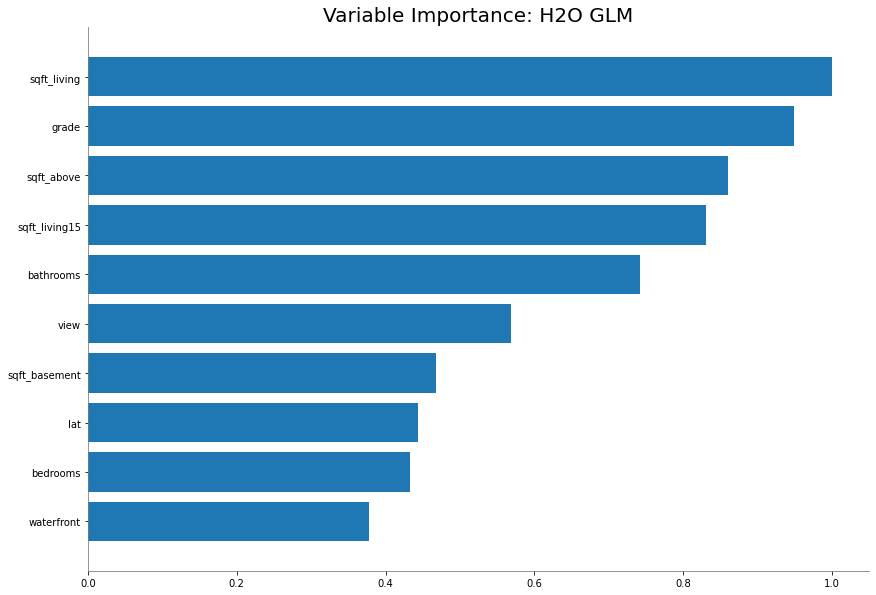

In [0]:
glm_fit1.varimp_plot()

In [0]:
glm_fit1.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,sqft_living,981.618966,1.000000,0.129898
1,grade,931.684390,0.949130,0.123290
2,sqft_above,844.518037,0.860332,0.111755
3,sqft_living15,815.767224,0.831043,0.107951
4,bathrooms,728.227635,0.741864,0.096366
...,...,...,...,...
386,date.20150513T000000,0.000000,0.000000,0.000000
387,date.20150514T000000,0.000000,0.000000,0.000000
388,date.20150515T000000,0.000000,0.000000,0.000000
389,date.20150524T000000,0.000000,0.000000,0.000000


In [0]:
glm_fit1.coef()

{'Intercept': 505160.43078150746,
 'bathrooms': 946.6217603077557,
 'bedrooms': 455.0009104096635,
 'condition': 84.24606999167887,
 'date.20140502T000000': 0.0,
 'date.20140503T000000': 0.0,
 'date.20140504T000000': 0.0,
 'date.20140505T000000': 0.0,
 'date.20140506T000000': 0.0,
 'date.20140507T000000': 0.0,
 'date.20140508T000000': 0.0,
 'date.20140509T000000': 0.0,
 'date.20140510T000000': 0.0,
 'date.20140511T000000': 0.0,
 'date.20140512T000000': 0.0,
 'date.20140513T000000': 0.0,
 'date.20140514T000000': 0.0,
 'date.20140515T000000': 0.0,
 'date.20140516T000000': 0.0,
 'date.20140517T000000': 0.0,
 'date.20140518T000000': 0.0,
 'date.20140519T000000': 0.0,
 'date.20140520T000000': 0.0,
 'date.20140521T000000': 0.0,
 'date.20140522T000000': 0.0,
 'date.20140523T000000': 0.0,
 'date.20140524T000000': 0.0,
 'date.20140525T000000': 0.0,
 'date.20140526T000000': 0.0,
 'date.20140527T000000': 0.0,
 'date.20140528T000000': 0.0,
 'date.20140529T000000': 0.0,
 'date.20140530T000000': 0.0

In [0]:
print(glm_fit1)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_fit1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 515.21 )",391,21,1,py_6_sid_a2b1




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 132392212845.53535
RMSE: 363857.40729788004
MAE: 230690.99173205651
RMSLE: 0.5406741461752895
R^2: 0.019172093037720384
Mean Residual Deviance: 132392212845.53535
Null degrees of freedom: 19461
Residual degrees of freedom: 19440
Null deviance: 2626981989511147.5
Residual deviance: 2576617246399809.0
AIC: 553679.7960846461

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-05-13 07:56:05,0.000 sec,0,2.626982e+15,1.349801e+11


##### Train a GLM with lambda search
Next we will do some automatic tuning by passing in a validation frame and setting lambda_search = True. Since we are training a GLM with regularization, we should try to find the right amount of regularization (to avoid overfitting). The model parameter, lambda, controls the amount of regularization in a GLM model and we can find the optimal value for lambda automatically by setting lambda_search = True and passing in a validation frame (which is used to evaluate model performance using a particular value of lambda).

In [0]:
glm_fit2 = H2OGeneralizedLinearEstimator(model_id='glm_fit2', lambda_search=True)
glm_fit2.train(x=x, y=y, training_frame=train, validation_frame=test)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
glm_fit2.coef()

{'Intercept': 539977.7851421824,
 'bathrooms': 0.10366902849092603,
 'bedrooms': 0.0,
 'condition': 0.0,
 'date.20140502T000000': 0.0,
 'date.20140503T000000': 0.0,
 'date.20140504T000000': 0.0,
 'date.20140505T000000': 0.0,
 'date.20140506T000000': 0.0,
 'date.20140507T000000': 0.0,
 'date.20140508T000000': 0.0,
 'date.20140509T000000': 0.0,
 'date.20140510T000000': 0.0,
 'date.20140511T000000': 0.0,
 'date.20140512T000000': 0.0,
 'date.20140513T000000': 0.0,
 'date.20140514T000000': 0.0,
 'date.20140515T000000': 0.0,
 'date.20140516T000000': 0.0,
 'date.20140517T000000': 0.0,
 'date.20140518T000000': 0.0,
 'date.20140519T000000': 0.0,
 'date.20140520T000000': 0.0,
 'date.20140521T000000': 0.0,
 'date.20140522T000000': 0.0,
 'date.20140523T000000': 0.0,
 'date.20140524T000000': 0.0,
 'date.20140525T000000': 0.0,
 'date.20140526T000000': 0.0,
 'date.20140527T000000': 0.0,
 'date.20140528T000000': 0.0,
 'date.20140529T000000': 0.0,
 'date.20140530T000000': 0.0,
 'date.20140531T000000': 

###### Evaluate model performance
Let's compare the performance of the two GLMs that were just trained.

In [0]:
glm_perf1 = glm_fit1.model_performance(test)
glm_perf2 = glm_fit2.model_performance(test)

In [0]:
# Print model performance
print(glm_perf1)
print(glm_perf2)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 130255413052.53004
RMSE: 360909.14792026265
MAE: 235457.25949786027
RMSLE: 0.549307075840044
R^2: 0.020120832190522075
Mean Residual Deviance: 130255413052.53004
Null degrees of freedom: 2150
Residual degrees of freedom: 2129
Null deviance: 285935013037402.56
Residual deviance: 280179393475992.12
AIC: 61200.30694559311


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 132930520870.77966
RMSE: 364596.38077026996
MAE: 238322.8732018713
RMSLE: 0.5560023866922381
R^2: -3.340473917923248e-06
Mean Residual Deviance: 132930520870.77966
Null degrees of freedom: 2150
Residual degrees of freedom: 2145
Null deviance: 285935013037402.56
Residual deviance: 285933550393047.06
AIC: 61212.03538506044



##### 2. Random Forest
H2O's Random Forest (RF) is implements a distributed version of the standard Random Forest algorithm and variable importance measures.

In [0]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

###### Train a default RF
First we will train a basic Random Forest model with default parameters. Random Forest will infer the response distribution from the response encoding. A seed is required for reproducibility.

In [0]:
# Initialize the RF estimator:

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)

In [0]:
rf_fit1.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


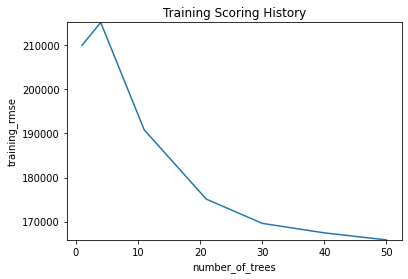

In [0]:
rf_fit1.plot()

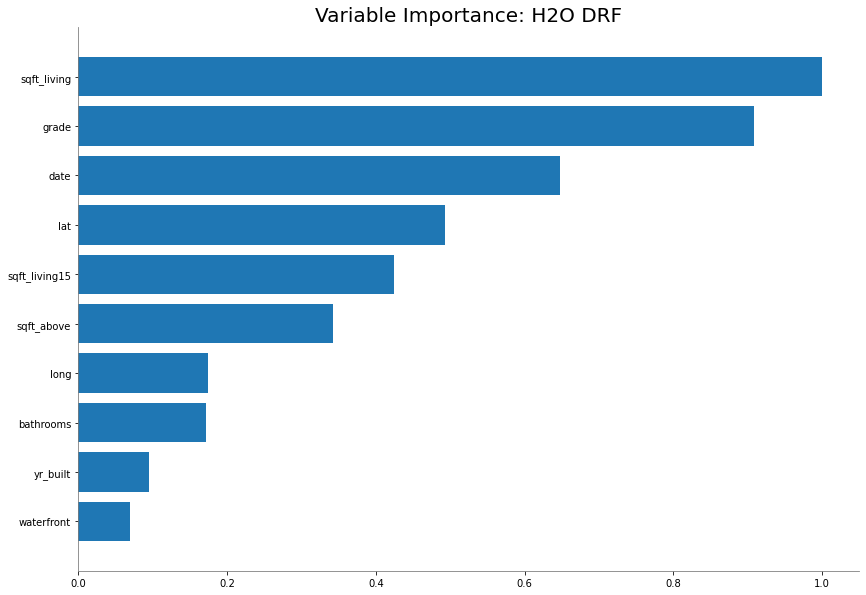

In [0]:
rf_fit1.varimp_plot()

In [0]:
rf_fit1.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-05-13 07:56:09,0.333 sec,0.0,NaN,NaN,NaN
1,,2020-05-13 07:56:13,4.295 sec,1.0,210020.313432,117129.877214,4.410853e+10
2,,2020-05-13 07:56:17,8.676 sec,4.0,215185.274799,112221.835917,4.630470e+10
3,,2020-05-13 07:56:21,12.964 sec,11.0,190836.607434,98244.736549,3.641861e+10
4,,2020-05-13 07:56:26,17.266 sec,21.0,175115.648388,90445.370677,3.066549e+10
5,,2020-05-13 07:56:30,21.363 sec,30.0,169620.967580,87303.290774,2.877127e+10
6,,2020-05-13 07:56:34,25.487 sec,40.0,167461.224673,85948.698848,2.804326e+10
7,,2020-05-13 07:56:38,29.497 sec,50.0,165868.154600,84883.552954,2.751224e+10


###### Train an RF with more trees
Next we will increase the number of trees used in the forest by setting ntrees = 100. The default number of trees in an H2O Random Forest is 50, so this RF will be twice as big as the default. Usually increasing the number of trees in an RF will increase performance as well. Unlike Gradient Boosting Machines (GBMs), Random Forests are fairly resistant (although not free from) overfitting by increasing the number of trees. See the GBM example below for additional guidance on preventing overfitting using H2O's early stopping functionality.

In [0]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=100, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


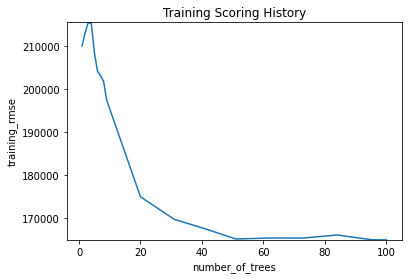

In [0]:
rf_fit2.plot()

###### Compare model performance
Let's compare the performance of the two RFs that were just trained.

In [0]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)

In [0]:
rf_perf1


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 25384031630.253162
RMSE: 159323.6693974036
MAE: 84098.55131573972
RMSLE: 0.1972731684728125
Mean Residual Deviance: 25384031630.253162


In [0]:
rf_perf2


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 25840944128.817387
RMSE: 160751.18702148792
MAE: 83327.57650885492
RMSLE: 0.19650195436450593
Mean Residual Deviance: 25840944128.817387


###### Cross-validate performance
Rather than using held-out test set to evaluate model performance, a user may wish to estimate model performance using cross-validation. Using the RF algorithm (with default model parameters) as an example, we demonstrate how to perform k-fold cross-validation using H2O. No custom code or loops are required, you simply specify the number of desired folds in the nfolds argument.
Since we are not going to use a test set here, we can use the original (full) dataset, which we called data rather than the subsampled train dataset. Note that this will take approximately k (nfolds) times longer than training a single RF model, since it will train k models in the cross-validation process (trained on n(k-1)/k rows), in addition to the final model trained on the full training_frame dataset with n rows.

In [0]:
rf_fit3 = H2ORandomForestEstimator(model_id='rf_fit3', seed=1, nfolds=5)
rf_fit3.train(x=x, y=y, training_frame=data)

drf Model Build progress: |███████████████████████████████████████████████| 100%


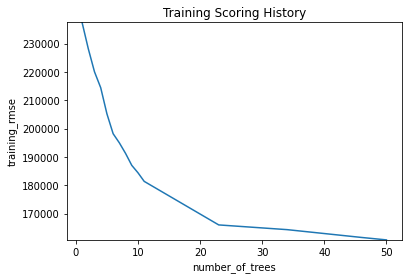

In [0]:
rf_fit3.plot()

In [0]:
rf_perf3 = rf_fit3.model_performance(test)

In [0]:
rf_perf3


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3616650007.49419
RMSE: 60138.59000254487
MAE: 31746.42304633019
RMSLE: 0.07843630306636075
Mean Residual Deviance: 3616650007.49419


In [0]:
print("Best rf model1 R^2: %.4f" % (rf_perf1.r2()))
print("Best rf model2 R^2: %.4f" % (rf_perf2.r2()))
print("Best rf model3 R^2: %.4f" % (rf_perf3.r2()))

Best rf model1 R^2: 0.8090
Best rf model2 R^2: 0.8056
Best rf model3 R^2: 0.9728


##### 3. Gradient Boosting Machine
H2O's Gradient Boosting Machine (GBM) offers a Stochastic GBM, which can increase performance quite a bit compared to the original GBM implementation.

In [0]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

###### Train a default GBM
First we will train a basic GBM model with default parameters. GBM will infer the response distribution from the response encoding if not specified explicitly through the distribution argument. A seed is required for reproducibility.

In [0]:
# Initialize and train the GBM estimator:

gbm_fit1 = H2OGradientBoostingEstimator(model_id='gbm_fit1', seed=1,nfolds=3)
gbm_fit1.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
gbm_fit1.predict(test_data=test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
305262
291291
592687
801035
559252
515324
383217
1.03126e+06
215522
810178


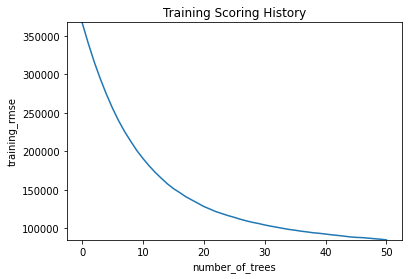

In [0]:
gbm_fit1.plot()

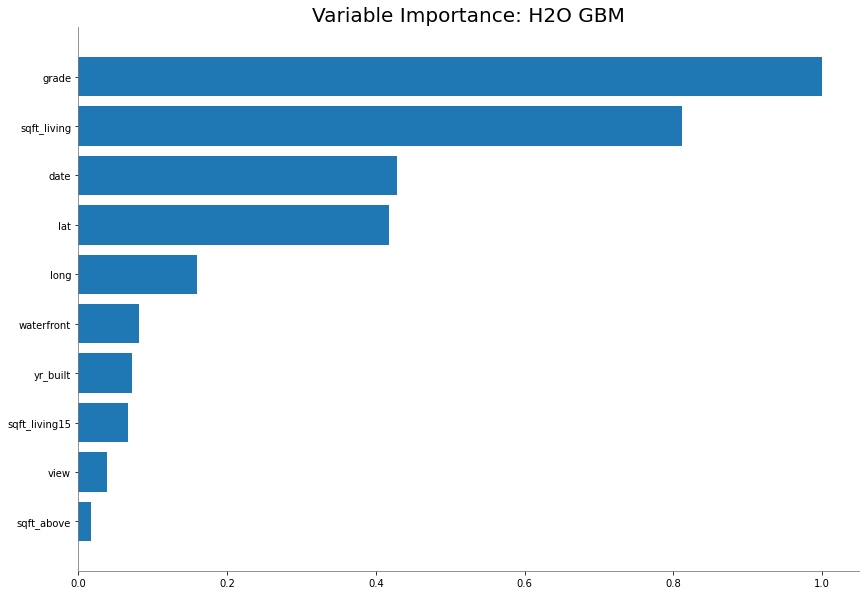

In [0]:
gbm_fit1.varimp_plot()

In [0]:
gbm_perf1 = gbm_fit1.model_performance(test)

In [0]:
gbm_perf1


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 27069990019.18346
RMSE: 164529.60225802366
MAE: 85935.11978674817
RMSLE: 0.20146329140222027
Mean Residual Deviance: 27069990019.18346


###### Train a GBM with more trees
Next we will increase the number of trees used in the GBM by setting ntrees=500. The default number of trees in an H2O GBM is 50, so this GBM will trained using ten times the default. Increasing the number of trees in a GBM is one way to increase performance of the model, however, you have to be careful not to overfit your model to the training data by using too many trees. To automatically find the optimal number of trees, you must use H2O's early stopping functionality. This example will not do that, however, the following example will.

In [0]:
gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2', ntrees=500, seed=1)
gbm_fit2.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


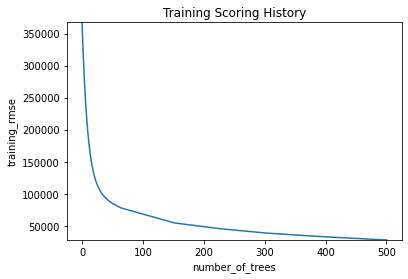

In [0]:
gbm_fit2.plot()

In [0]:
gbm_perf2 = gbm_fit2.model_performance(test)

In [0]:
gbm_perf2


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 25165706148.0514
RMSE: 158637.02640950945
MAE: 84964.869738381
RMSLE: 0.20119808209519022
Mean Residual Deviance: 25165706148.0514


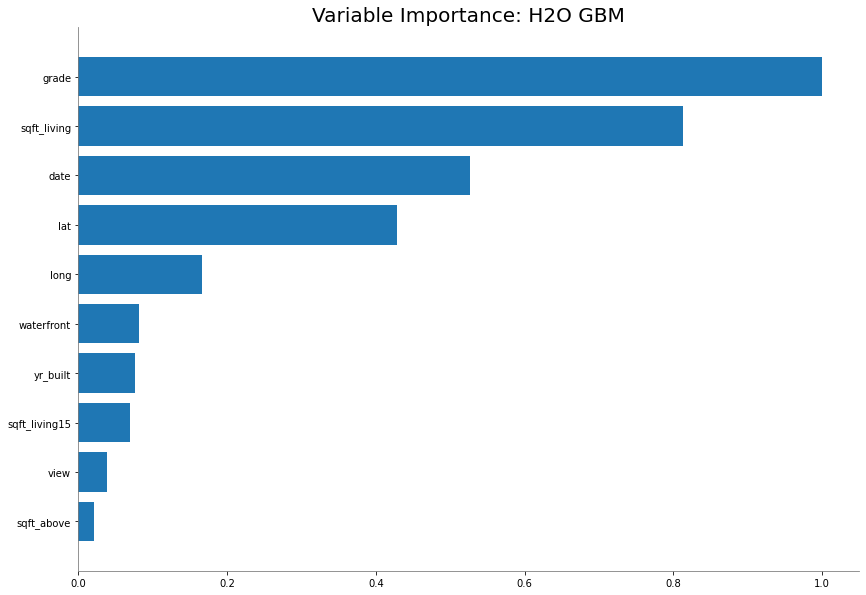

In [0]:
gbm_fit2.varimp_plot()

###### Train a GBM with early stopping
We will again set ntrees = 500, however, this time we will use early stopping in order to prevent overfitting (from too many trees). All of H2O's algorithms have early stopping available, however, with the exception of Deep Learning, it is not enabled by default.
There are several parameters that should be used to control early stopping. The three that are generic to all the algorithms are: stopping_rounds, stopping_metric and stopping_tolerance. The stopping metric is the metric by which you'd like to measure performance, and so we will choose AUC here. The score_tree_interval is a parameter specific to Random Forest and GBM. Setting score_tree_interval=5 will score the model after every five trees. The parameters we have set below specify that the model will stop training after there have been three scoring intervals where the AUC has not increased more than 0.0005. Since we have specified a validation frame, the stopping tolerance will be computed on validation AUC rather than training AUC.

In [0]:
# Now let's use early stopping to find optimal ntrees

gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='RMSE',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


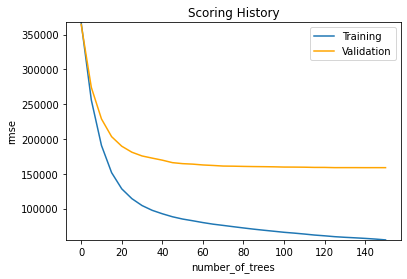

In [0]:
gbm_fit3.plot()

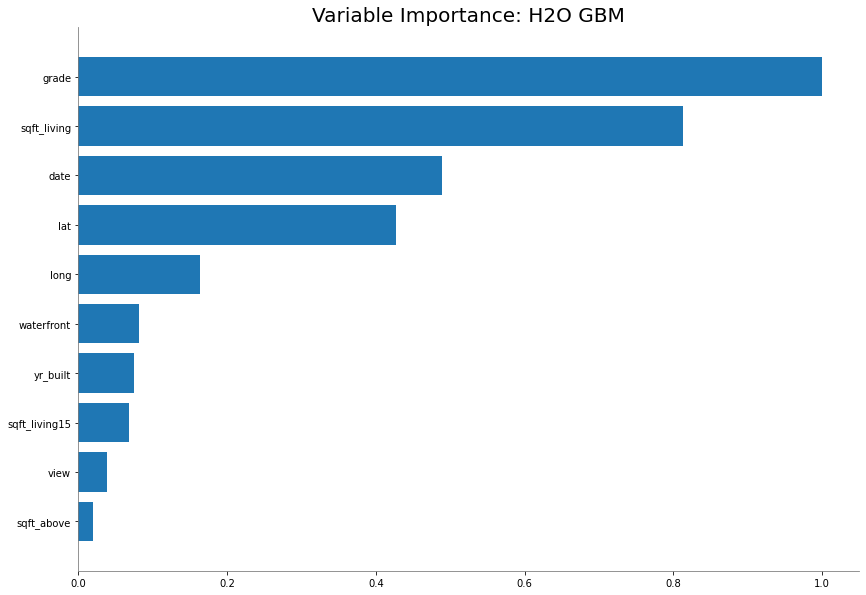

In [0]:
gbm_fit3.varimp_plot()

###### Compare model performance
Let's compare the performance of the three GBMs that were just trained.

In [0]:
gbm_perf1 = gbm_fit1.model_performance(test)
gbm_perf2 = gbm_fit2.model_performance(test)
gbm_perf3 = gbm_fit3.model_performance(test)

In [0]:
# Retreive test set AUC
print(gbm_perf1)
print(gbm_perf2)
print(gbm_perf3)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 27069990019.18346
RMSE: 164529.60225802366
MAE: 85935.11978674817
RMSLE: 0.20146329140222027
Mean Residual Deviance: 27069990019.18346


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 25165706148.0514
RMSE: 158637.02640950945
MAE: 84964.869738381
RMSLE: 0.20119808209519022
Mean Residual Deviance: 25165706148.0514


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 25208164562.376556
RMSE: 158770.79253558116
MAE: 83290.98032462603
RMSLE: 0.19604735989851624
Mean Residual Deviance: 25208164562.376556



###### Scoring History
To examine the scoring history, use the scoring_history method on a trained model. If score_tree_interval is not specified, it will score at various intervals, as we can see for gbm_fit2.scoring_history() below. However, regular 5-tree intervals are used for gbm_fit3.scoring_history().
The gbm_fit2 was trained only using a training set (no validation set), so the scoring history is calculated for training set performance metrics only.

In [0]:
gbm_fit2.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-05-13 07:59:42,0.057 sec,0.0,367396.329833,233426.255360,1.349801e+11
1,,2020-05-13 07:59:42,0.185 sec,1.0,340717.486036,215216.397322,1.160884e+11
2,,2020-05-13 07:59:42,0.277 sec,2.0,316059.740604,199266.747815,9.989376e+10
3,,2020-05-13 07:59:42,0.362 sec,3.0,294101.608452,184622.538657,8.649576e+10
4,,2020-05-13 07:59:42,0.445 sec,4.0,274093.009218,172060.156088,7.512698e+10
...,...,...,...,...,...,...,...
66,,2020-05-13 07:59:54,12.131 sec,227.0,45549.756250,31910.324395,2.074780e+09
67,,2020-05-13 07:59:58,16.145 sec,304.0,38636.646677,27142.915539,1.492790e+09
68,,2020-05-13 08:00:02,20.167 sec,388.0,33538.926791,23480.311031,1.124860e+09
69,,2020-05-13 08:00:06,24.241 sec,475.0,29146.182941,20280.266845,8.495000e+08


In [0]:
print("Best gbm model1 R2: %.4f" % (gbm_fit1.r2()))
print("Best gbm model2 R2: %.4f" % (gbm_fit2.r2()))
print("Best gbm model3 R2: %.4f" % (gbm_fit3.r2()))

Best gbm model1 R2: 0.9466
Best gbm model2 R2: 0.9941
Best gbm model3 R2: 0.9776


##### 4. Deep Learning
H2O's Deep Learning algorithm is a multilayer feed-forward artificial neural network. It can also be used to train an autoencoder, however, in the example below we will train a standard supervised prediction model.

In [0]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

###### Train a default DL
First we will train a basic DL model with default parameters. DL will infer the response distribution from the response encoding if not specified explicitly through the distribution argument. H2O's DL will not be reproducbible if run on more than a single core, so in this example, the performance metrics below may vary slightly from what you see on your machine.
In H2O's DL, early stopping is enabled by default, so below, it will use the training set and default stopping parameters to perform early stopping.

In [0]:
# Initialize and train the DL estimator:

dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', seed=1)
dl_fit1.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


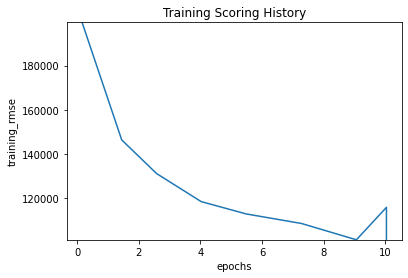

In [0]:
dl_fit1.plot()

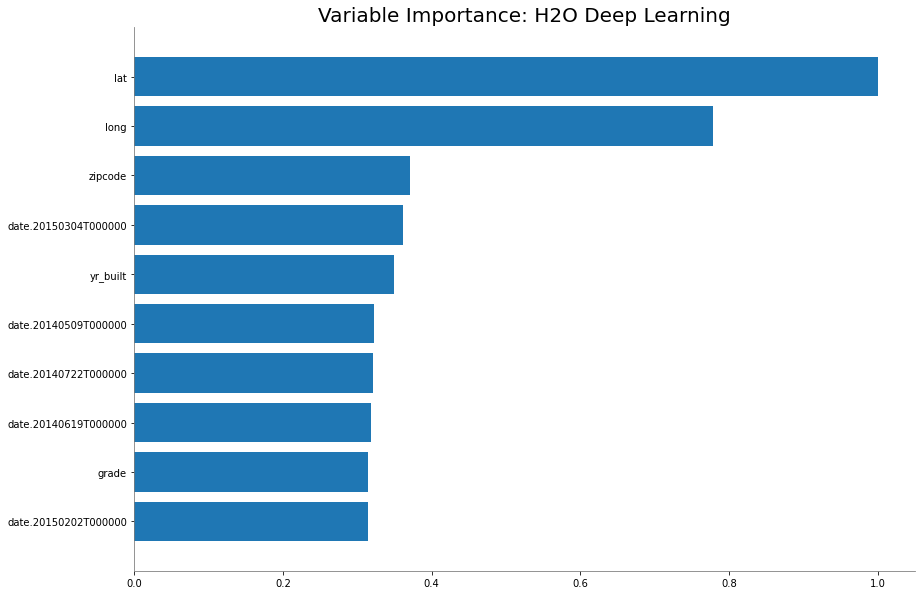

In [0]:
dl_fit1.varimp_plot()

###### Train a DL with new architecture and more epochs
Next we will increase the number of epochs used in the GBM by setting epochs=20 (the default is 10). Increasing the number of epochs in a deep neural net may increase performance of the model, however, you have to be careful not to overfit your model. To automatically find the optimal number of epochs, you must use H2O's early stopping functionality. Unlike the rest of the H2O algorithms, H2O's DL will use early by default, so we will first turn it off in the next example by setting stopping_rounds=0, for comparison.

In [0]:
dl_fit2 = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=20, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl_fit2.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


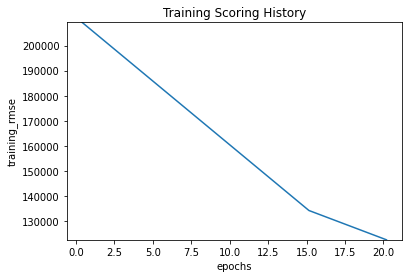

In [0]:
dl_fit2.plot()

###### Train a DL with early stopping
This example will use the same model parameters as dl_fit2, however, we will turn on early stopping and specify the stopping criterion. We will also pass a validation set, as is recommended for early stopping.

In [0]:
dl_fit3 = H2ODeepLearningEstimator(model_id='dl_fit3', 
                                   epochs=20, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='RMSE',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl_fit3.train(x=x, y=y, training_frame=train, validation_frame=test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


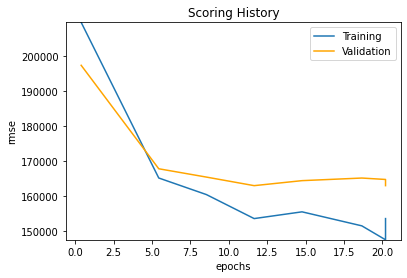

In [0]:
dl_fit3.plot()

###### Compare model performance
Again, we will compare the model performance of the three models using a test set and AUC.

In [0]:
dl_perf1 = dl_fit1.model_performance(test)
dl_perf2 = dl_fit2.model_performance(test)
dl_perf3 = dl_fit3.model_performance(test)

In [0]:
print(dl_perf1)
print(dl_perf2)
print(dl_perf3)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 16112680871.456476
RMSE: 126935.73520272561
MAE: 74072.30198589471
RMSLE: 0.18377073724806411
Mean Residual Deviance: 16112680871.456476


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 16825178509.335608
RMSE: 129711.90581182441
MAE: 78752.33921058403
RMSLE: 0.19521386167304863
Mean Residual Deviance: 16825178509.335608


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 26562060084.779476
RMSE: 162978.7105261895
MAE: 101174.79946721286
RMSLE: 0.24182139593393534
Mean Residual Deviance: 26562060084.779476



In [0]:
dl_fit2.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-05-13 08:01:41,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-05-13 08:01:42,0.522 sec,28856 obs/sec,0.391429,1,7618.0,209262.609923,4.379084e+10,117743.406827,0.683864
2,,2020-05-13 08:01:47,5.528 sec,57116 obs/sec,15.155226,39,294951.0,134167.417166,1.800090e+10,83264.521316,0.870047
3,,2020-05-13 08:01:48,7.190 sec,58428 obs/sec,20.198541,52,393104.0,122473.206352,1.499969e+10,77305.233256,0.891714


In [0]:
print("Best deep learning model1 R2: %.4f" % (dl_fit1.r2()))
print("Best deep learning model2 R2: %.4f" % (dl_fit2.r2()))
print("Best deep learning model3 R2: %.4f" % (dl_fit3.r2()))

Best deep learning model1 R2: 0.9264
Best deep learning model2 R2: 0.8917
Best deep learning model3 R2: 0.8297


## AutoML
H2O provides the ability to perform automated machine learning. The process is very simple and is oriented on the users without much knowledge and experience in machine learning. AutoML will iterate through different models and parameters trying to find the best. There are several parameters to specify, but in most cases all you need to do is to set only the maximum runtime in seconds or maximum number of models. You can think about AutoML as something similar to GridSearch but on the level of models rather than on the level of parameters.
<br>

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems. AutoML makes machine learning available in a true sense, even to people with no major expertise in this field. H2O’s AutoML tends to automate the training and the tuning part of the models.

In [0]:
from h2o.automl import H2OAutoML
autoML = H2OAutoML(max_models = 20, max_runtime_secs=120)
autoML.train(x=x,
             y=y,
             training_frame=train,
             validation_frame=test)

AutoML progress: |
08:01:58.989: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [0]:
leaderboard = autoML.leaderboard
print(leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200513_080158,1.55108e+10,124542,1.55108e+10,68121.2,0.171286
StackedEnsemble_BestOfFamily_AutoML_20200513_080158,1.64536e+10,128271,1.64536e+10,69334.4,0.173338
XGBoost_grid__1_AutoML_20200513_080158_model_1,1.70373e+10,130527,1.70373e+10,69878.3,0.17531
XGBoost_grid__1_AutoML_20200513_080158_model_2,1.92794e+10,138850,1.92794e+10,77749.1,0.191965
GBM_grid__1_AutoML_20200513_080158_model_1,2.10383e+10,145046,2.10383e+10,81380.8,0.197813
XGBoost_3_AutoML_20200513_080158,2.56517e+10,160161,2.56517e+10,89100.5,0.21313
DeepLearning_grid__1_AutoML_20200513_080158_model_1,3.60829e+10,189955,3.60829e+10,113963,0.264112
DeepLearning_1_AutoML_20200513_080158,3.70764e+10,192552,3.70764e+10,114017,0.266124
XGBoost_2_AutoML_20200513_080158,3.75551e+10,193791,3.75551e+10,115962,0.269675
XRT_1_AutoML_20200513_080158,5.32099e+10,230673,5.32099e+10,115956,0.275389


In [0]:
leaderboard.head(rows=leaderboard.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200513_080158,1.55108e+10,124542,1.55108e+10,68121.2,0.171286
StackedEnsemble_BestOfFamily_AutoML_20200513_080158,1.64536e+10,128271,1.64536e+10,69334.4,0.173338
XGBoost_grid__1_AutoML_20200513_080158_model_1,1.70373e+10,130527,1.70373e+10,69878.3,0.17531
XGBoost_grid__1_AutoML_20200513_080158_model_2,1.92794e+10,138850,1.92794e+10,77749.1,0.191965
GBM_grid__1_AutoML_20200513_080158_model_1,2.10383e+10,145046,2.10383e+10,81380.8,0.197813
XGBoost_3_AutoML_20200513_080158,2.56517e+10,160161,2.56517e+10,89100.5,0.21313
DeepLearning_grid__1_AutoML_20200513_080158_model_1,3.60829e+10,189955,3.60829e+10,113963,0.264112
DeepLearning_1_AutoML_20200513_080158,3.70764e+10,192552,3.70764e+10,114017,0.266124
XGBoost_2_AutoML_20200513_080158,3.75551e+10,193791,3.75551e+10,115962,0.269675
XRT_1_AutoML_20200513_080158,5.32099e+10,230673,5.32099e+10,115956,0.275389


In [0]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(autoML.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

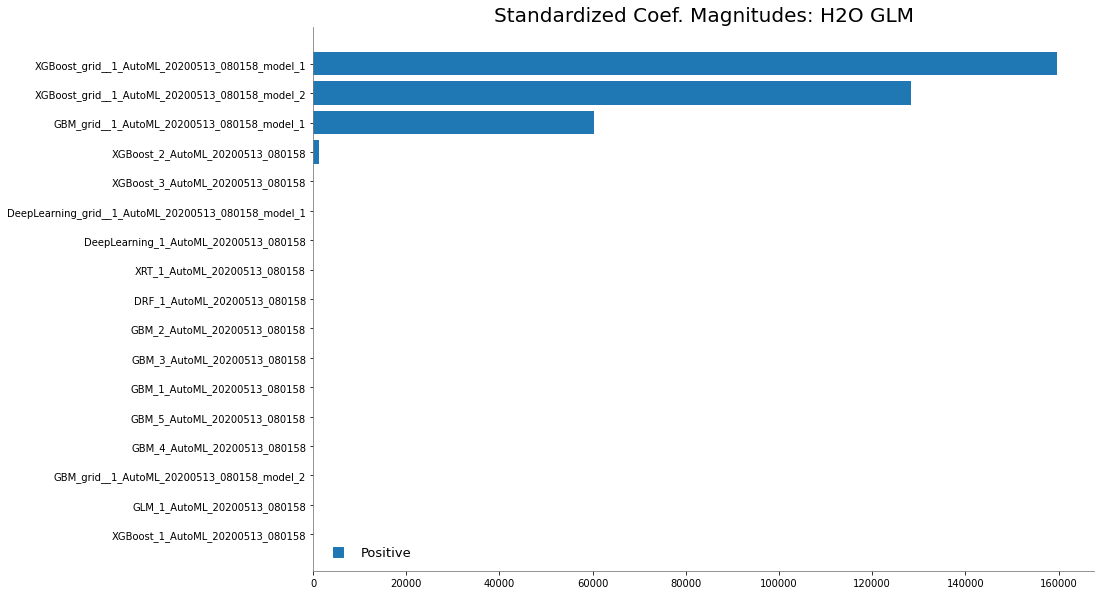

In [0]:
%matplotlib inline
metalearner.std_coef_plot()

In [0]:
autoML.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200513_080158

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 5041375063.243507
RMSE: 71002.64124131938
MAE: 44710.81928733254
RMSLE: 0.1203998851412469
R^2: 0.96265096530064
Mean Residual Deviance: 5041375063.243507
Null degrees of freedom: 19461
Residual degrees of freedom: 19457
Null deviance: 2626981989511147.5
Residual deviance: 98115241480845.14
AIC: 490042.22944803536

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 15937566178.425678
RMSE: 126244.07383487622
MAE: 68149.56644252436
RMSLE: 0.1688035694668138
R^2: 0.8801056423081153
Mean Residual Deviance: 15937566178.425678
Null degrees of freedom: 2150
Residual degrees of freedom: 2146
Null deviance: 285935013037402.56
Residual deviance: 34281704849793.633
AIC: 56647.44686094945

ModelMetricsRegressionGLM: stackedensemble


In [0]:
# Get third model
m = h2o.get_model(leaderboard[2,"model_id"])

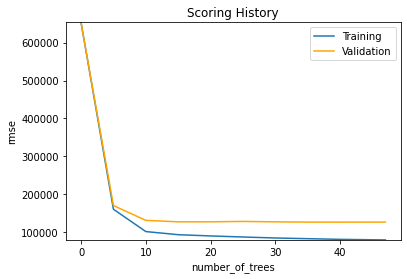

In [0]:
#autoML.leader.plot()
m.plot()

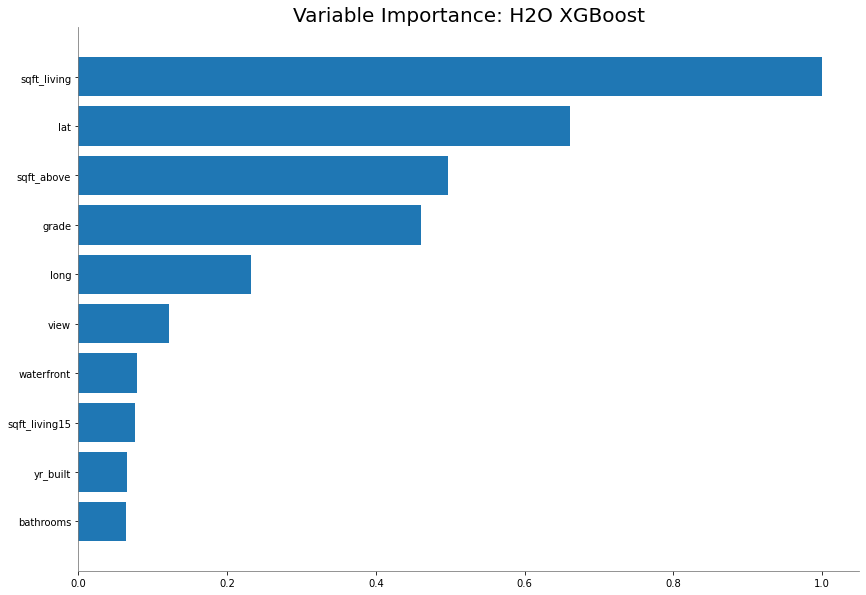

In [0]:
#autoML.leader.varimp_plot()
m.varimp_plot()

In [0]:
perf = m.model_performance(test)
perf


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 16096177402.123222
RMSE: 126870.71136445647
MAE: 70265.26739016737
RMSLE: 0.17352841940593852
Mean Residual Deviance: 16096177402.123222


In [0]:
print("autoML R2: %.4f" % (m.r2()))

autoML R2: 0.9526


Step three is to train a stacked ensemble of the models you made in step two.

In [0]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [0]:
nfolds = 5

In [0]:
m_GLM = H2OGeneralizedLinearEstimator(
    model_id = "glm_def",
    nfolds = nfolds,
    fold_assignment = "Modulo",
    keep_cross_validation_predictions = True
)
m_GLM.train(x=x, y=y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
m_GBM = H2OGradientBoostingEstimator(
    model_id = "gbm_def",
    ntrees=500, 
    seed=1,
    nfolds = nfolds,
    fold_assignment = "Modulo",
    keep_cross_validation_predictions = True
)
m_GBM.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
m_RF = H2ORandomForestEstimator(
    model_id = "rf_def",
    nfolds = nfolds,
    seed=1,
    fold_assignment = "Modulo",
    keep_cross_validation_predictions = True
)
m_RF.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
m_DF = H2ODeepLearningEstimator(
    model_id = "rf_def",
    nfolds = nfolds,
    seed=1,
    fold_assignment = "Modulo",
    keep_cross_validation_predictions = True
)
m_DF.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [0]:
models = [m_GLM.model_id, m_GBM.model_id, m_RF.model_id, m_DF.model_id]

In [0]:
m_SE = H2OStackedEnsembleEstimator(model_id="SE_glm_gbm_rf_df",
                                   base_models=models)
m_SE.train(x,y,train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


Repeat steps two and three until your best model (which is usually your ensemble model, but does not have to be) has the minimum required performance on the validation data. Note: only one model has to achieve the minimum required performance. If multiple models achieve it, choose the best performing one to deliver.

Analyzing the performance

In [0]:
all_models = [m_GLM, m_GBM, m_RF, m_DF, m_SE]

In [0]:
names = ["GLM","GBM","RF","DF","SE"]

In [0]:
import pandas as pd
pd.Series(map(lambda x: x.rmse(),all_models),names)

GLM    363857.407298
GBM     28115.988967
RF     165868.154600
DF      98347.535974
SE      86899.450859
dtype: float64

My target is an RMSE below $123,000. My model has to achieve the minimum required performance. As you saw above, GBM, DF, SE achieved the minimum required performance. GBM is my best model among five models.

Step four is to get the performance on the test data of your chosen model/ensemble, and confirm that this also reaches the minimum target on the test data. Record your model performance in comments at the end of your script.

In [0]:
perf1 = m_GLM.model_performance(test)
perf1


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 130255413052.53003
RMSE: 360909.14792026265
MAE: 235457.25949786027
RMSLE: 0.549307075840044
R^2: 0.020120832190522187
Mean Residual Deviance: 130255413052.53003
Null degrees of freedom: 2150
Residual degrees of freedom: 2129
Null deviance: 285935013037402.7
Residual deviance: 280179393475992.1
AIC: 61200.30694559311


In [0]:
perf2 = m_GBM.model_performance(test)
perf2


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 25165706148.0514
RMSE: 158637.02640950945
MAE: 84964.869738381
RMSLE: 0.20119808209519022
Mean Residual Deviance: 25165706148.0514


In [0]:
perf3 = m_RF.model_performance(test)
perf3


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 14443735449.048698
RMSE: 120182.0928801321
MAE: 72158.82319571653
RMSLE: 0.18196642337044483
Mean Residual Deviance: 14443735449.048698


In [0]:
perf4 = m_DF.model_performance(test)
perf4


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 14443735449.048698
RMSE: 120182.0928801321
MAE: 72158.82319571653
RMSLE: 0.18196642337044483
Mean Residual Deviance: 14443735449.048698


In [0]:
perf5 = m_SE.model_performance(test)
perf5


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 14431973211.294569
RMSE: 120133.14784560741
MAE: 71137.39373154665
RMSLE: 0.17701072950138289
R^2: 0.8914318447984276
Mean Residual Deviance: 14431973211.294569
Null degrees of freedom: 2150
Residual degrees of freedom: 2147
Null deviance: 285935013037402.7
Residual deviance: 31043174377494.617
AIC: 56431.996961526194


Now, let's save our models.

In [0]:
# download the model built above to your local machine
my_local_model1 = h2o.download_model(m_GLM, path="/Users/Downloads")

# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model1)

In [0]:
# download the model built above to your local machine
my_local_model2 = h2o.download_model(m_GBM, path="/Users/Downloads")

# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model2)

In [0]:
# download the model built above to your local machine
my_local_model3 = h2o.download_model(m_RF, path="/Users/Downloads")

# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model3)

In [0]:
# download the model built above to your local machine
my_local_model4 = h2o.download_model(m_DF, path="/Users/Downloads")

# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model4)

In [0]:
# download the model built above to your local machine
my_local_model5 = h2o.download_model(m_SE, path="/Users/Downloads")

# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model5)

Step five is to start a fresh session and confirm your script will run, reproduce the results, and that there are no bugs or typos.

In [0]:
h2o.cluster().shutdown()

H2O session _sid_816a closed.


In [0]:
h2o.shutdown(prompt=False)

/Users/kang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.
